<a href="https://colab.research.google.com/github/simonefmr/datascience_mvp/blob/main/MVP_desenvolvimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Pós Data Science - PUC Rio - Sprint 1**
### Simone de Fátima Marques Ramos

## **1. Introdução**

O Banco Central do Brasil divulga mensalmente informações agregadas das operações de crédito recebidas através do Sistema de Informações de Créditos – SCR. Os relatórios são atualizados no último dia útil do mês, disponibilizando os dados após 60 dias do fechamento de cada período. São disponibilizados dados agregados de Carteira Ativa, Inadimplência e Ativo Problemático com possibilidade de detalhamento por tipo de cliente (PF/PJ), modalidade de crédito, unidade da federação, Classificação Nacional de Atividades Econômicas – CNAE (PJ), natureza da ocupação (PF), porte/rendimento dos clientes, origem de recursos e indexador das operações. Adicionalmente ao recurso gráfico apresentado na página, o relatório também disponibiliza aproximadamente 700 mil séries mensais acessíveis pelo portal de dados abertos. A publicação compreende o período de junho de 2012 até a atualidade. (Fonte: SCR.data - Painel de Operações de Crédito - Metodologia - https://dadosabertos.bcb.gov.br/dataset/scr_data/resource/6ed8c917-aace-4906-a8c4-09dd736e6872)

## **1.1. Definição do Problema**

O objetivo deste projeto é avaliar a evolução do endividamento das pessoas físicas no Brasil, no ano de 2022, conforme registro feito pelas instituições financeiras e comunicados ao Banco Central através do Sistema de Informações de Créditos (SCR). 

Fonte: 

### **1.2. Problema de aprendizado supervisionado ou não supervisionado?**

Apesar de existir uma série histórica anterior, existem diversos fatores que podem influenciar a concessão de crédito. Inflação, Taxa Selic, Câmbio, programas governamentais etc. Com isto, não temos resultados esperados. Desta forma, podemos considerar como um problema de aprendizado não supervisionado. Tentarei explorar os dados e aprender os possíveis relacionamentos entre eles.

### **1.3. Hipóteses sobre o problema**

Atuando no setor bancário/financeiro, pude perceber um intenso uso de crédito nos últimos anos. Num cenário de inflação alta (IPCA de 10,06% em 2021 e 5,79% em 2022), muitas vezes as famílias recorrem à contratação de operações de crédito para pagar despesas recorrentes. 

Além disso, a elevação da margem (30% para 35% e depois para 40% da renda bruta) para contratação de crédito consignado em alguns convênios como INSS e servidores federais, alavancou a concessão de crédito, ainda que as taxas não estivessem atrativas.

A hipótese que vou analisar é se houve uma elevação real no endividamento geral das famílias e se houve elevação da inadimplência.

## **2. Importação de pacotes, bibliotecas e carregamento dos dados**

### **2.1. Importação de pacotes e bibliotecas**

In [28]:
# Importando bibliotecas e pacotes que serão utilizados na análise

# Importação de Bibliotecas
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix

# para tratamento de missings
import missingno as ms 

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Para tratamento das datas
from datetime import datetime

from IPython.display import display

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
     

In [2]:
# Versões das Bibliotecas utilizadas

pd_pd = pd.__version__
np_np = np.__version__
sns_sns = sns.__version__

print('Versões utilizadas na análise:')
print('Pandas = '+pd_pd)
print('Numpy = '+np_np)
print('Seaborn = '+sns_sns)

Versões utilizadas na análise:
Pandas = 1.5.3
Numpy = 1.22.4
Seaborn = 0.12.2


## **2.2. Carregando os dados**

### **2.2.1. Restrições ou condições para seleção dos dados**

Os dados do SCR foram obtidos no Portal de Dados Abertos do Banco Central do Brasil (https://dadosabertos.bcb.gov.br/). As informações são disponibilizadas desde 2012 mas, num primeiro momento, optei por trabalhar apenas com o ano de 2022.

Inicialmente, os dados analisados continham informações completas de clientes PF (Pessoas Físicas) e PJ (Pessoas Jurídicas) e o segmento das instituições(SR  - Segmento Resolução nº 4.553/2017), que variava de S1 a S5.

Devido ao tamanho dos arquivos (acima de 250MB cada base mensal), foi necessário reduzir a base analisada e foram excluídos ainda no arquivo *.csv* todas operações de clientes PJ e utilizado apenas informações de instituições S1.

*S1 - Bancos múltiplos, bancos comerciais, bancos de investimento, bancos de câmbio e caixas econômicas que tenham porte (Exposição/Produto Interno Bruto) superior a 10% ou exerçam atividade internacional relevante (ativos no exterior superiores a US$ 10 bilhões)*

### **2.2.2. Importando e unificando os dados**

In [3]:
# Cada arquivo .csv representa um mês da base de dados. Serão importados individualmente.

url_2022_01 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202201.csv?raw=true', sep=';') # Base Janeiro/2022
url_2022_02 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202202.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Fevereiro/2022
url_2022_03 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202203.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Março/2022
url_2022_04 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202204.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Abril/2022
url_2022_05 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202205.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Maio/2022
url_2022_06 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202206.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Junho/2022
url_2022_07 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202207.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Julho/2022
url_2022_08 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202208.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Agosto/2022
url_2022_09 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202209.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Setembro/2022
url_2022_10 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202210.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Outubro/2022
url_2022_11 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202211.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Novembro/2022
url_2022_12 = pd.read_csv('https://github.com/simonefmr/datascience_mvp/blob/main/database_202212.csv?raw=true', sep=';', encoding='ISO-8859-1') # Base Dezembro/2022


In [4]:
colunas = ['data_base', 'uf', 'tcb', 'sr', 'cliente', 'ocupacao', 'cnae_secao','cnae_subclasse', 'porte', 'modalidade', 'origem', 'indexador', 'numero_de_operacoes', 'a_vencer_ate_90_dias', 'a_vencer_de_91_ate_360_dias', 'a_vencer_de_361_ate_1080_dias', 'a_vencer_de_1081_ate_1800_dias', 'a_vencer_de_1801_ate_5400_dias', 'a_vencer_acima_de_5400_dias', 'vencido_acima_de_15_dias', 'carteira_ativa', 'carteira_inadimplida_arrastada', 'ativo_problematico']

In [5]:
# Unificando os dados em um só dataset

scr_2022 = pd.concat(([url_2022_01, url_2022_02, url_2022_03, url_2022_04, url_2022_05, url_2022_06, url_2022_07, url_2022_08, url_2022_09, url_2022_10, url_2022_11, url_2022_12]), names='colunas')

### **2.2.:3. Definindo os atributos do dataset**



In [6]:
# Verificando as primeiras linhas

# Os dados foram carregados corretamente e estão classificados por database e depois por estado (UF) em ordem alfabética

scr_2022.head(5)

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,"0,00","5561,30","0,00","0,00","0,00","0,00","0,00","5561,30","0,00","0,00"
1,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,"3791034,42","982378,88","74016,25","9006,30","3741,61","0,00","281036,64","5141214,10","176044,79","237272,93"
2,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,...,"1764710,58","4456712,22","11316762,96","9822143,26","12026778,46","0,00","306584,87","39693692,35","1208264,90","1278420,45"
3,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,...,"293111,91","888394,40","1134747,73","636850,19","286267,62","0,00","1054,48","3240426,33","0,00","131338,05"
4,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,...,"140231,05","384054,93","867701,21","678425,45","1528340,60","353735,40","0,00","3952488,64","0,00","102216,54"


In [7]:
# Verificando as últimas linhas observamos a database de Dezembro (última cronologicamente) e seguindo a ordem alfabética das UF's.

scr_2022.tail(5)

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
34684,31/12/2022,TO,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Sem rendimento,PF - Cartão de crédito,...,"19519,07","3862,50","0,00","0,00","0,00","0,00","63499,23","86880,80","59662,51","59716,09"
34685,31/12/2022,TO,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Sem rendimento,PF - Empréstimo com consignação em folha,...,"12487,31","33544,11","36794,48","3700,46","456,58","0,00","13523,80","100506,74","15452,51","16351,70"
34686,31/12/2022,TO,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Sem rendimento,PF - Empréstimo sem consignação em folha,...,"2854,12","6740,12","9479,85","1238,55","0,00","0,00","0,00","20312,64","0,00","0,00"
34687,31/12/2022,TO,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Sem rendimento,PF - Outros créditos,...,"18,33","0,00","0,00","0,00","0,00","0,00","0,00","18,33","0,00","0,00"
34688,31/12/2022,TO,Bancário,S1,PF,PF - Servidor ou empregado público,-,-,PF - Sem rendimento,PF - Veículos,...,"2830,24","7595,95","14456,94","2850,96","0,00","0,00","0,00","27734,09","0,00","0,00"


## **3. Análise dos Dados**

In [8]:
# Verificando dimensões do dataset (quantos atributos e instâncias existem)

scr_2022.shape

(416856, 23)

In [9]:
# Resumo estatístico dos atributos com valor numérico.

scr_2022.describe()

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,416856,416856,416856,412963,416856,416856,416856,416856,416856,416856,...,416856,416856,416856,416856,416856,416856,416856,416856,416856,416856
unique,12,27,2,1,1,8,1,1,9,7,...,357248,362196,344336,299917,278181,94648,288423,407788,237230,272559
top,30/11/2022,SP,Bancário,S1,PF,PF - Outros,-,-,PF - Mais de 5 a 10 salários mínimos,PF - Outros créditos,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","250,00","0,00","0,00"
freq,38621,22636,412963,412963,416856,64464,416856,416856,57213,96596,...,46745,46236,61695,101252,126312,295631,104336,66,152144,120373


Neste ponto, o retorno não foi o esperado. Não foram apresentados valores numéricos dos dados que quero analisar. Foi gerado apenas contagens da quantidade de instâncias.

### **3.1 Definindo os Atributos**

A definição dos atributos é feita conforme normativos do Banco Central, Receita Federal e IBGE, sendo informados no manual de Painel de Crédito - metodologia do SCR.

**'data_base'**: Data da apuração dos saldos de endividamento e repassado pelas instituições financeiras ao Banco Central.

**'uf'**: A informação segregada por unidades da federação é baseada no CEP de residência das pessoas físicas ou da Sede das pessoas jurídicas.

**'tcb'**: Tipo de Consolidado Bancário. Classificado em Bancário (Bancos comerciais, múltiplos, caixas econômicas, banco de câmbio etc), Não bancário (Não bancário de crédito, Não bancário de mercado de capitais e instituiçõe de pagamento) ou Cooperativas.

**'sr'**: Classificação conforme Segmento Resolução nº 4.553/2017, se refere ao porte da instituição. Neste MVP utilizarei apenas a segmentação S1, que trata de Bancos múltiplos, bancos comerciais, bancos de investimento, bancos de câmbio e caixas econômicas que tenham porte (Exposição/Produto Interno Bruto) superior a 10% ou exerçam atividade internacional relevante (ativos no exterior superiores a US$ 10 bilhões).

**'cliente'**: Pessoa Física ou Pessoa Jurídica (utilizarei apenas a base de PF)

**'ocupacao'**: Natureza da ocupação das pessoas físicas, podendo ser servidor ou empregado público, empregado de entidades sem fins lucrativos, empregado de empresa privada, aposentado/pensionista, autônomo, empresário, MEI ou outros.

**'cnae_secao'**: Código Nacional de Atividades Econômicos - CNAE (Pessoas Jurídicas). Busca padronizar a forma com que os diferentes órgãos do País classificam as unidades econômicas segundo suas atividades, refere às atividades exercidas por uma pessoa jurídica. Está informação será desconsiderada neste projeto.

**'cnae_subclasse'**: As subclasses segmentam ainda mais a atividade, informando e especificando o que cada unidade (matriz ou filial) produz. Também será desconsiderada pois não trataremos dados de PJ.

**'porte'**: Porte está relacionado à renda das pessoas físicas (em salários mínimos) ou ao porte de pessoa jurídica (Micro, Pequeno, Médio ou Grande), definido pela receita com base na receita bruta anual de cada empresa.

**'modalidade'**: Tipo de crédito contratado (cartão de crédito, empréstimo com ou sem consignação em folha), habitacional, rural, veículos etc.

**'origem'**: Se o recurso tem ou não destinação específica

**'indexador'**: Prefixado, Pós-fixado, Flutuantes, Índices de preços, TCR/TRFC ou Outros indexadores.

**'numero_de_operacoes'**: Número de operações de crédito para uma dada série. Abaixo de 15 operações, o relatório apresenta a informação "<= 15".

**'a_vencer_ate_90_dias' (a)**: Somatório dos créditos a vencer até 90 dias.

**'a_vencer_de_91_ate_360_dias' (b)**: Somatório dos créditos a vencer de 91 a 360 dias.

**'a_vencer_de_361_ate_1080_dias' (c)**: Somatório dos créditos a vencer de 361 a 1080 dias.

**'a_vencer_de_1081_ate_1800_dias' (d)**: Somatório dos créditos a vencer de 1081 até 1800 dias.

**'a_vencer_de_1801_ate_5400_dias' (e)**: Somatório dos créditos a vencer de 1801 a 5400 dias.

**'a_vencer_acima_de_5400_dias' (f)**: Somatório dos créditos a vencer acima de 5400 dias

**'vencido_acima_de_15_dias'**: Somatório de créditos vencidos acima de 15 dias

**'carteira_ativa'**: Somatório de todas as operações a vencer (a, b, c, d, e, f).

**'carteira_inadimplida_arrastada'**: Somatório das operações de crédito a vencer e vencidos que possuam alguma parcela vencida há mais de 90 dias.

**'ativo_problematico'**: São consideradas como ativos problemáticos as operações de crédito em atraso há mais de noventa dias e as operações nas quais existem indícios de que respectiva obrigação não será integralmente honrada. Entende-se que há indicativos de que a obrigação poderá não ser integralmente honrada, entre outros eventos, quando a operação for objeto de reestruturação e a instituição financeira reconhecer contabilmente deterioração significativa da 
qualidade do crédito do tomador, classificando-o entre os níveis de risco E e H.

### **3.2 Pré-processamento de dados**

In [10]:
# Na coluna de Número de Operações, vou desconsiderar as instituições que possuem 
# <= 15 operações por serem muito pouco expressivas em relação ao restante dos dados

scr_2022 = scr_2022[scr_2022.numero_de_operacoes != '<= 15']
scr_2022.head(5)

,data_base,uf,tcb,sr,cliente,ocupacao,cnae_secao,cnae_subclasse,porte,modalidade,...,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
1,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,...,"3791034,42","982378,88","74016,25","9006,30","3741,61","0,00","281036,64","5141214,10","176044,79","237272,93"
2,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,...,"1764710,58","4456712,22","11316762,96","9822143,26","12026778,46","0,00","306584,87","39693692,35","1208264,90","1278420,45"
3,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,...,"293111,91","888394,40","1134747,73","636850,19","286267,62","0,00","1054,48","3240426,33","0,00","131338,05"
4,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Habitacional,...,"140231,05","384054,93","867701,21","678425,45","1528340,60","353735,40","0,00","3952488,64","0,00","102216,54"
5,31/01/2022,AC,Bancário,S1,PF,PF - Aposentado/pensionista,-,-,PF - Acima de 20 salários mínimos,PF - Outros créditos,...,"111136,85","204003,84","129116,57","65424,61","32518,41","0,00","27261,51","569461,79","24239,26","121027,64"


In [11]:
# Colunas a serem excluídas:
# Coluna que especifica o TCB pois não interfere se é bancário ou não";
# A coluna SR, pois utilizaremos apenas instituições do tipo "S1";
# A coluna de tipo de cliente pois já selecionamos apenas os do tipo "PF";
# E as colunas de CNAE pois se referem ao enquadramento de empresas PJ.

scr_2022.drop(['tcb', 'sr', 'cliente', 'cnae_secao','cnae_subclasse'], axis=1, inplace=True)

In [12]:
# Quais são os tipos de atributos que foram carregados?

scr_2022.dtypes       # Neste ponto pude perceber que todos os atributos estão 
                      # classificados como "object" (string/texto). Será necessário 
                      # converter as instâncias para realizar as análises corretamente.

data_base                         object
uf                                object
ocupacao                          object
porte                             object
modalidade                        object
origem                            object
indexador                         object
numero_de_operacoes               object
a_vencer_ate_90_dias              object
a_vencer_de_91_ate_360_dias       object
a_vencer_de_361_ate_1080_dias     object
a_vencer_de_1081_ate_1800_dias    object
a_vencer_de_1801_ate_5400_dias    object
a_vencer_acima_de_5400_dias       object
vencido_acima_de_15_dias          object
carteira_ativa                    object
carteira_inadimplida_arrastada    object
ativo_problematico                object
dtype: object

Podemos observar que todos os atributos estão classificados como sendo do tipo "object". Será necessário fazer a conversão de algumas colunas para permitirmos a análise descritiva.

In [13]:
# Informando que a coluna 'data_base' é do tipo datetime64[ns]

scr_2022['data_base'] = pd.to_datetime(scr_2022['data_base'], format='%d/%m/%Y')

In [14]:
# Convertendo coluna de 'numero_de_operacoes' de String para Int

scr_2022['numero_de_operacoes'] = scr_2022['numero_de_operacoes'].astype(int)
scr_2022.head(5)

,data_base,uf,ocupacao,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
1,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,708,"3791034,42","982378,88","74016,25","9006,30","3741,61","0,00","281036,64","5141214,10","176044,79","237272,93"
2,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,Prefixado,715,"1764710,58","4456712,22","11316762,96","9822143,26","12026778,46","0,00","306584,87","39693692,35","1208264,90","1278420,45"
3,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,142,"293111,91","888394,40","1134747,73","636850,19","286267,62","0,00","1054,48","3240426,33","0,00","131338,05"
4,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,23,"140231,05","384054,93","867701,21","678425,45","1528340,60","353735,40","0,00","3952488,64","0,00","102216,54"
5,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Outros créditos,Sem destinação específica,Prefixado,106,"111136,85","204003,84","129116,57","65424,61","32518,41","0,00","27261,51","569461,79","24239,26","121027,64"


In [15]:
# Quando carreguei os dados, o Python não entendeu alguns atributos como float
# pois utiliza outro tipo de formatação. Precisei alterar os separadores para
# que ele faça a correta leitura (de "xx.xxx,xx" para o formato "xxxxx.xx").

scr_2022['a_vencer_ate_90_dias']            = scr_2022['a_vencer_ate_90_dias'].str.replace('.','').str.replace(',','.')
scr_2022['a_vencer_de_91_ate_360_dias']     = scr_2022['a_vencer_de_91_ate_360_dias'].str.replace('.','').str.replace(',','.')
scr_2022['a_vencer_de_361_ate_1080_dias']   = scr_2022['a_vencer_de_361_ate_1080_dias'].str.replace('.','').str.replace(',','.')
scr_2022['a_vencer_de_1081_ate_1800_dias']  = scr_2022['a_vencer_de_1081_ate_1800_dias'].str.replace('.','').str.replace(',','.')
scr_2022['a_vencer_de_1801_ate_5400_dias']  = scr_2022['a_vencer_de_1801_ate_5400_dias'].str.replace('.','').str.replace(',','.')
scr_2022['a_vencer_acima_de_5400_dias']     = scr_2022['a_vencer_acima_de_5400_dias'].str.replace('.','').str.replace(',','.')
scr_2022['vencido_acima_de_15_dias']        = scr_2022['vencido_acima_de_15_dias'].str.replace('.','').str.replace(',','.')
scr_2022['carteira_ativa']                  = scr_2022['carteira_ativa'].str.replace('.','').str.replace(',','.')
scr_2022['carteira_inadimplida_arrastada']  = scr_2022['carteira_inadimplida_arrastada'].str.replace('.','').str.replace(',','.')
scr_2022['ativo_problematico']              = scr_2022['ativo_problematico'].str.replace('.','').str.replace(',','.')

In [16]:
scr_2022.reset_index(drop=True)

,data_base,uf,ocupacao,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,708,3791034.42,982378.88,74016.25,9006.30,3741.61,0.00,281036.64,5141214.10,176044.79,237272.93
1,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,Prefixado,715,1764710.58,4456712.22,11316762.96,9822143.26,12026778.46,0.00,306584.87,39693692.35,1208264.90,1278420.45
2,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,142,293111.91,888394.40,1134747.73,636850.19,286267.62,0.00,1054.48,3240426.33,0.00,131338.05
3,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,23,140231.05,384054.93,867701.21,678425.45,1528340.60,353735.40,0.00,3952488.64,0.00,102216.54
4,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Outros créditos,Sem destinação específica,Prefixado,106,111136.85,204003.84,129116.57,65424.61,32518.41,0.00,27261.51,569461.79,24239.26,121027.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240718,2022-12-31,TO,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,PF - Rural e agroindustrial,Com destinação específica,Prefixado,503,1582387.83,5609156.72,8623400.43,5140945.68,3522942.53,0.00,177178.01,24656011.20,223523.23,464553.53
240719,2022-12-31,TO,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,PF - Rural e agroindustrial,Sem destinação específica,Outros indexadores,20,348321.59,924866.80,2095143.92,2078806.10,1300597.26,0.00,0.00,6747735.67,0.00,1906556.62
240720,2022-12-31,TO,PF - Servidor ou empregado público,PF - Mais de 5 a 10 salários mínimos,PF - Veículos,Sem destinação específica,Prefixado,1589,6362986.88,16572479.32,24844450.35,5428605.76,25882.33,0.00,342798.35,53577202.99,626333.19,1213672.26
240721,2022-12-31,TO,PF - Servidor ou empregado público,PF - Sem rendimento,PF - Cartão de crédito,Sem destinação específica,Prefixado,28,19519.07,3862.50,0.00,0.00,0.00,0.00,63499.23,86880.80,59662.51,59716.09


In [17]:
# Após alterar os separadores, informo que se trata de outro tipo de dado,
# utilizando a conversão de string para float da base monetária

scr_2022['a_vencer_ate_90_dias']                = scr_2022['a_vencer_ate_90_dias'].astype(dtype ='float')
scr_2022['a_vencer_de_91_ate_360_dias']         = scr_2022['a_vencer_de_91_ate_360_dias'].astype(dtype ='float')
scr_2022['a_vencer_de_361_ate_1080_dias']       = scr_2022['a_vencer_de_361_ate_1080_dias'].astype(dtype ='float')
scr_2022['a_vencer_de_1081_ate_1800_dias']      = scr_2022['a_vencer_de_1081_ate_1800_dias'].astype(dtype ='float')
scr_2022['a_vencer_de_1801_ate_5400_dias']      = scr_2022['a_vencer_de_1801_ate_5400_dias'].astype(dtype ='float')
scr_2022['a_vencer_acima_de_5400_dias']         = scr_2022['a_vencer_acima_de_5400_dias'].astype(dtype ='float')
scr_2022['vencido_acima_de_15_dias']            = scr_2022['vencido_acima_de_15_dias'].astype(dtype ='float')
scr_2022['carteira_ativa']                      = scr_2022['carteira_ativa'].astype(dtype ='float')
scr_2022['carteira_inadimplida_arrastada']      = scr_2022['carteira_inadimplida_arrastada'].astype(dtype ='float')
scr_2022['ativo_problematico']                  = scr_2022['ativo_problematico'].astype(dtype ='float')

scr_2022.head(5)

,data_base,uf,ocupacao,porte,modalidade,origem,indexador,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
1,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Cartão de crédito,Sem destinação específica,Prefixado,708,3791034.42,982378.88,74016.25,9006.30,3741.61,0.0,281036.64,5141214.10,176044.79,237272.93
2,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo com consignação em folha,Sem destinação específica,Prefixado,715,1764710.58,4456712.22,11316762.96,9822143.26,12026778.46,0.0,306584.87,39693692.35,1208264.90,1278420.45
3,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,142,293111.91,888394.40,1134747.73,636850.19,286267.62,0.0,1054.48,3240426.33,0.00,131338.05
4,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Habitacional,Com destinação específica,Pós-fixado,23,140231.05,384054.93,867701.21,678425.45,1528340.60,353735.4,0.00,3952488.64,0.00,102216.54
5,2022-01-31,AC,PF - Aposentado/pensionista,PF - Acima de 20 salários mínimos,PF - Outros créditos,Sem destinação específica,Prefixado,106,111136.85,204003.84,129116.57,65424.61,32518.41,0.0,27261.51,569461.79,24239.26,121027.64


In [18]:
# Quais são os tipos de dados dos atributos?
# Após as alterações de separador e uso dos comandos "astype" pude fazer a 
# análise com variáveis numéricas 

scr_2022.dtypes

data_base                         datetime64[ns]
uf                                        object
ocupacao                                  object
porte                                     object
modalidade                                object
origem                                    object
indexador                                 object
numero_de_operacoes                        int64
a_vencer_ate_90_dias                     float64
a_vencer_de_91_ate_360_dias              float64
a_vencer_de_361_ate_1080_dias            float64
a_vencer_de_1081_ate_1800_dias           float64
a_vencer_de_1801_ate_5400_dias           float64
a_vencer_acima_de_5400_dias              float64
vencido_acima_de_15_dias                 float64
carteira_ativa                           float64
carteira_inadimplida_arrastada           float64
ativo_problematico                       float64
dtype: object

In [19]:
# Tratamento de missings

scr_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240723 entries, 1 to 34685
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data_base                       240723 non-null  datetime64[ns]
 1   uf                              240723 non-null  object        
 2   ocupacao                        240723 non-null  object        
 3   porte                           240723 non-null  object        
 4   modalidade                      240723 non-null  object        
 5   origem                          240723 non-null  object        
 6   indexador                       240723 non-null  object        
 7   numero_de_operacoes             240723 non-null  int64         
 8   a_vencer_ate_90_dias            240723 non-null  float64       
 9   a_vencer_de_91_ate_360_dias     240723 non-null  float64       
 10  a_vencer_de_361_ate_1080_dias   240723 non-null  float64 

In [20]:
# Verificando se existem dados faltantes, discrepantes ou inconsistentes

scr_2022.isnull().sum()

data_base                         0
uf                                0
ocupacao                          0
porte                             0
modalidade                        0
origem                            0
indexador                         0
numero_de_operacoes               0
a_vencer_ate_90_dias              0
a_vencer_de_91_ate_360_dias       0
a_vencer_de_361_ate_1080_dias     0
a_vencer_de_1081_ate_1800_dias    0
a_vencer_de_1801_ate_5400_dias    0
a_vencer_acima_de_5400_dias       0
vencido_acima_de_15_dias          0
carteira_ativa                    0
carteira_inadimplida_arrastada    0
ativo_problematico                0
dtype: int64

<Axes: >

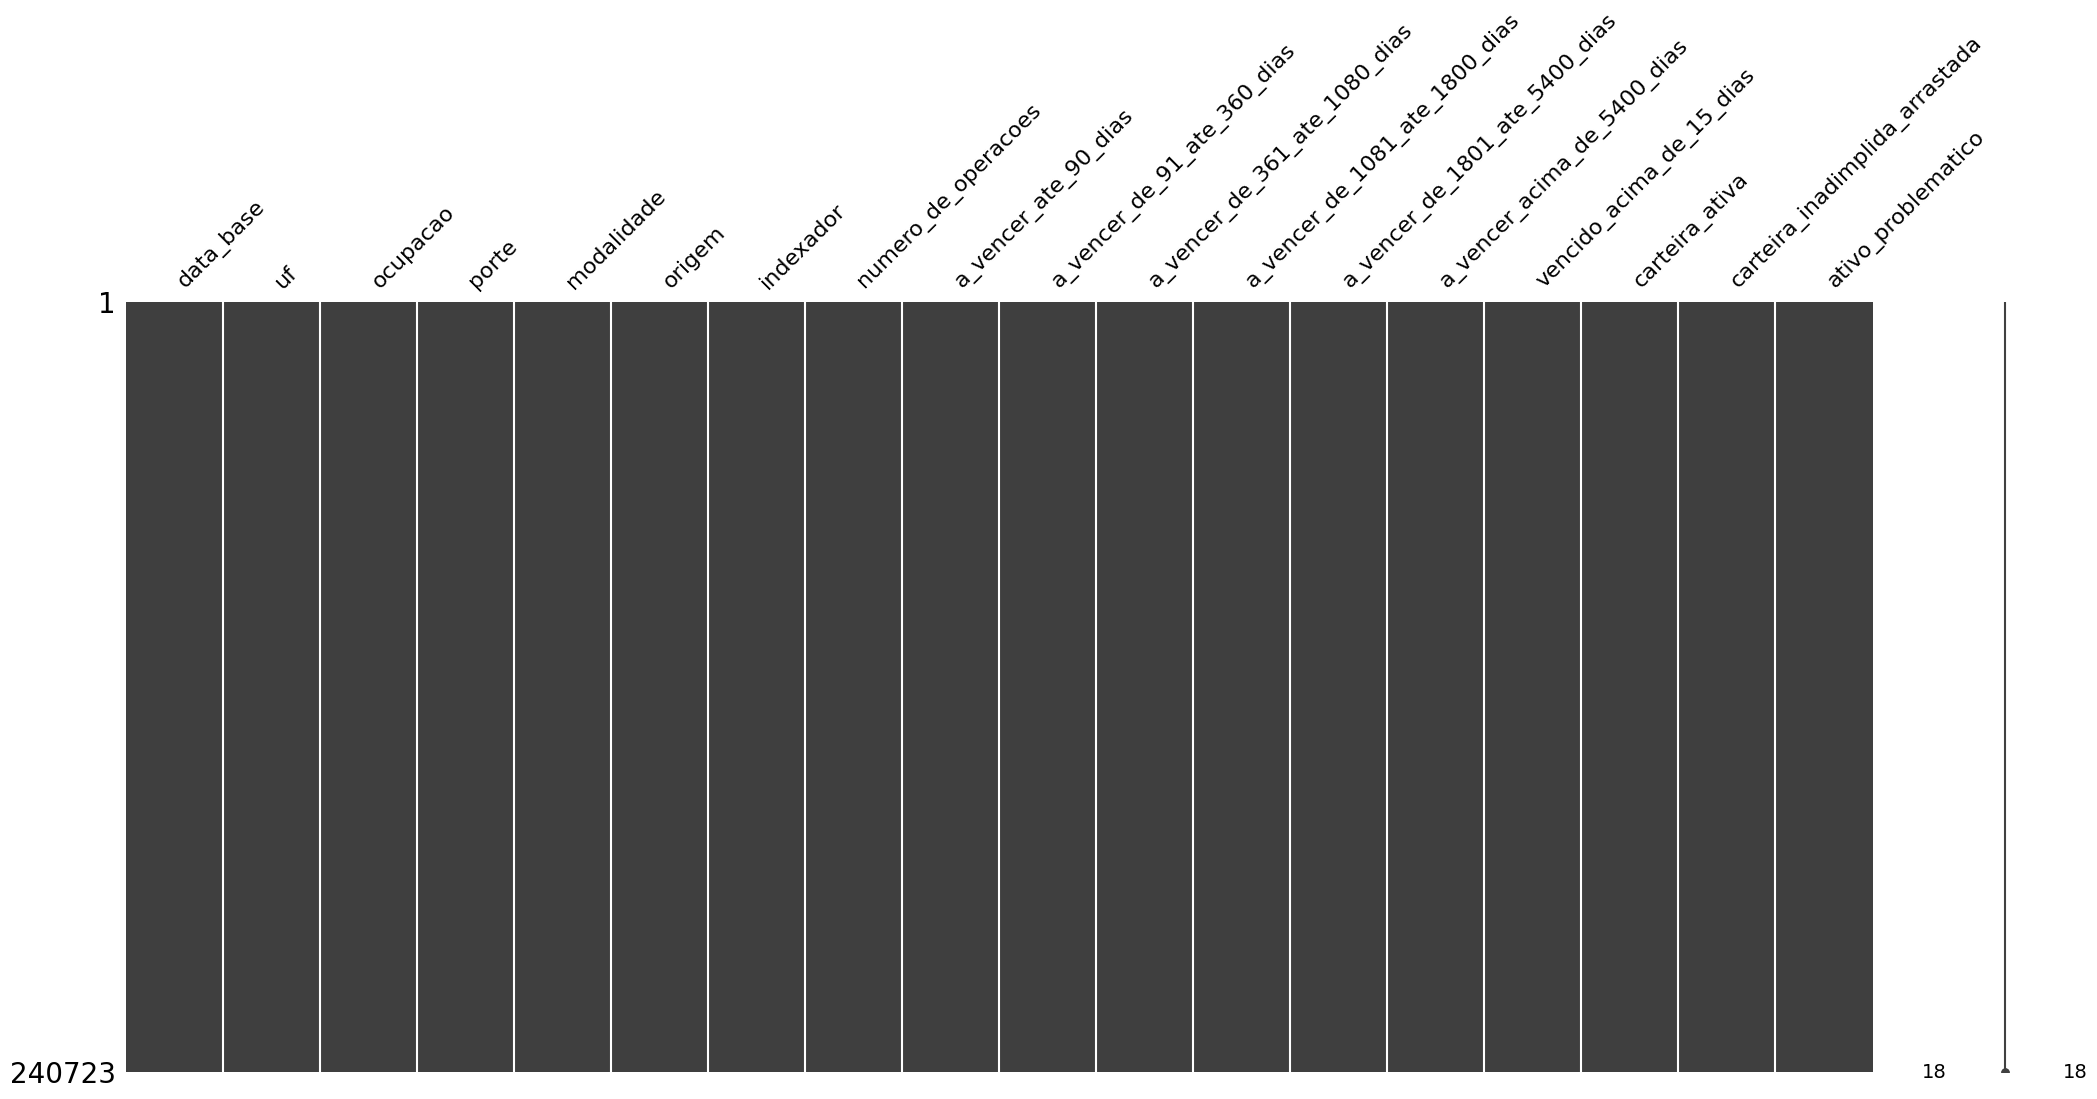

In [21]:
# Exibindo visualização matricial que evidencia a ausência de nulidade do dataset
# Neste caso não será preciso fazer ajustes de faltantes

ms.matrix(scr_2022)

Neste dataset encontro atributos zerados mas eles não são dados faltantes (NaN). A contagem de não-nulos é igual à quantidade de linhas observada nas dimensões do dataset (240723).

### **3.3 Estatísticas descritivas**

In [22]:
# Verificando dimensões do dataset após exclusão de colunas e linhas de números
# de operações <= 15

# Podemos observar a redução de 23 para 18 colunas e de 416856 para 240723 linhas

scr_2022.shape

(240723, 18)

In [23]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
scr_2022.describe()

,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
count,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05,2.407230e+05
mean,1.542400e+04,1.703634e+07,2.129329e+07,2.573811e+07,1.470085e+07,2.346384e+07,7.353847e+06,2.490806e+06,1.120771e+08,3.461569e+06,7.906398e+06
std,1.297310e+05,1.058666e+08,1.221170e+08,1.339072e+08,9.001374e+07,2.021769e+08,8.476876e+07,1.823956e+07,6.039333e+08,1.690880e+07,3.723722e+07
min,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.680000e+00,0.000000e+00,0.000000e+00
25%,5.600000e+01,6.693543e+04,1.379712e+05,1.017854e+05,2.333556e+04,4.580385e+03,0.000000e+00,2.158659e+04,9.895141e+05,1.859454e+04,8.786235e+04
50%,3.130000e+02,5.317000e+05,1.109679e+06,1.287506e+06,5.000168e+05,1.856776e+05,0.000000e+00,1.903299e+05,7.047710e+06,3.334848e+05,7.154419e+05
75%,3.050500e+03,4.948103e+06,8.671135e+06,9.214637e+06,3.928463e+06,2.866550e+06,6.163350e+02,1.031878e+06,4.309107e+07,1.738889e+06,3.826516e+06
max,1.117326e+07,5.501507e+09,7.125116e+09,4.790032e+09,3.830907e+09,1.016385e+10,4.624733e+09,1.662220e+09,2.507677e+10,1.334669e+09,1.726685e+09



Não se verifica valores faltantes ou inconsistes. As discrepâncias são esperadas tendo em vista que cada linha representa um tipo de operação ou destinação específicos e a renda do tomador também influencia o volume disponibilizado. Além disso, o total de clientes varia muito de uma instituição para outra, impactando a quantidade de operações realizadas.

In [24]:
# Correlação de Pearson

scr_2022.corr(method = 'pearson')

,numero_de_operacoes,a_vencer_ate_90_dias,a_vencer_de_91_ate_360_dias,a_vencer_de_361_ate_1080_dias,a_vencer_de_1081_ate_1800_dias,a_vencer_de_1801_ate_5400_dias,a_vencer_acima_de_5400_dias,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
numero_de_operacoes,1.000000,0.723543,0.327019,0.169287,0.115743,0.047104,0.020724,0.953004,0.295203,0.833288,0.587959
a_vencer_ate_90_dias,0.723543,1.000000,0.614201,0.331357,0.263561,0.165561,0.102988,0.699151,0.503236,0.620591,0.502632
a_vencer_de_91_ate_360_dias,0.327019,0.614201,1.000000,0.781395,0.669645,0.425460,0.264864,0.303181,0.771695,0.416387,0.414836
a_vencer_de_361_ate_1080_dias,0.169287,0.331357,0.781395,1.000000,0.955202,0.758100,0.582259,0.117983,0.919256,0.429906,0.522967
a_vencer_de_1081_ate_1800_dias,0.115743,0.263561,0.669645,0.955202,1.000000,0.884034,0.722358,0.067107,0.941806,0.386383,0.521710
a_vencer_de_1801_ate_5400_dias,0.047104,0.165561,0.425460,0.758100,0.884034,1.000000,0.948056,0.036454,0.883841,0.354800,0.561077
a_vencer_acima_de_5400_dias,0.020724,0.102988,0.264864,0.582259,0.722358,0.948056,1.000000,0.025095,0.766872,0.347193,0.580361
vencido_acima_de_15_dias,0.953004,0.699151,0.303181,0.117983,0.067107,0.036454,0.025095,1.000000,0.265951,0.867188,0.618712
carteira_ativa,0.295203,0.503236,0.771695,0.919256,0.941806,0.883841,0.766872,0.265951,1.000000,0.539589,0.653679
carteira_inadimplida_arrastada,0.833288,0.620591,0.416387,0.429906,0.386383,0.354800,0.347193,0.867188,0.539589,1.000000,0.883063


Pude observar que existe uma forte correlação entre o número de operações e a 'carteira_inadimplida_arrastada' (que possui alguma parcela vencida há mais de 90 dias). O 'ativo_problematico' tem relação moderada e a 'carteira_ativa' (créditos adimplentes) tem relação desprezível. 
No período analisado, existe uma forte relação entre o incremento no número de operações contratadas e a inadimplência geral da carteira.



fmean()

Fast, floating point arithmetic mean, with optional weighting.

geometric_mean()

Geometric mean of data.

harmonic_mean()

Harmonic mean of data.

median()

Median (middle value) of data.

median_low()

Low median of data.

median_high()

High median of data.

median_grouped()

Median, or 50th percentile, of grouped data.

mode()

Single mode (most common value) of discrete or nominal data.

multimode()

List of modes (most common values) of discrete or nominal data.

quantiles()

Divide data into intervals with equal probability.

### **5.3 Normalização e Padronização**


# Calcular a média aritmétia, mediana, variância e desvio-padrão
mediana = np.median(data)
media = np.mean(data)
desv_pad = np.std(data)
variancia = np.var(data)

# Mostrar os resultados
print('Mediana: ', mediana)
print('Média: ', media)
print('Desvio Padrão: ', desv_pad)
print('Variância: ', variancia)

# Plotar Histograma
plt.hist(data, bins=5)
plt.xlabel('Salários')
plt.ylabel('Frequência')
plt.title('Distribuição Salarial')
plt.show()

## **4. Visualização**

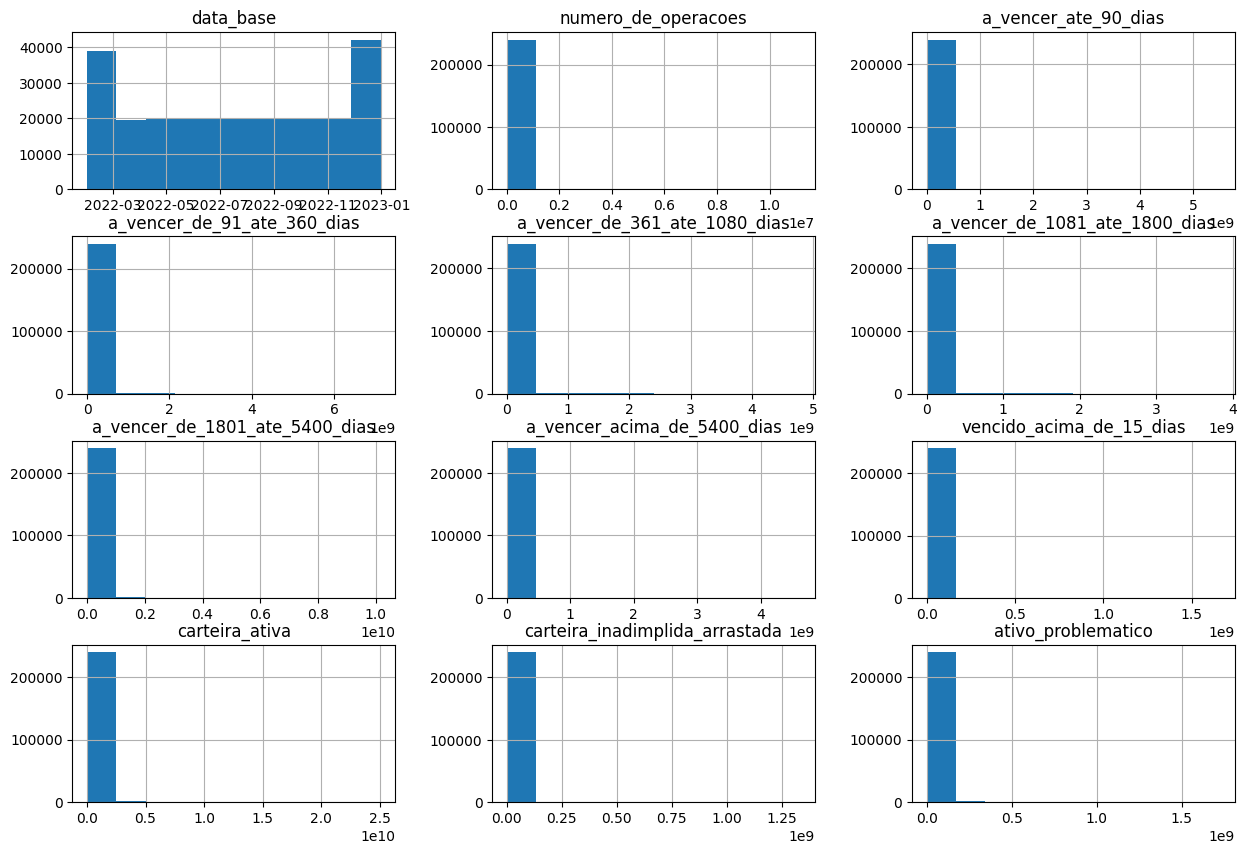

In [25]:
# Histograma
scr_2022.hist(figsize = (15,10))
plt.show()

In [ ]:
# Plotando as barras

# Prepara a figura (fig) e a área do gráfico (ax)
fig, ax = plt.subplots()

# Plota o gráfico de barras
ax.bar(x = scr_2022['data_base'], height = scr_2022['carteira_ativa'])

# Exibe o gráfico
plt.show()

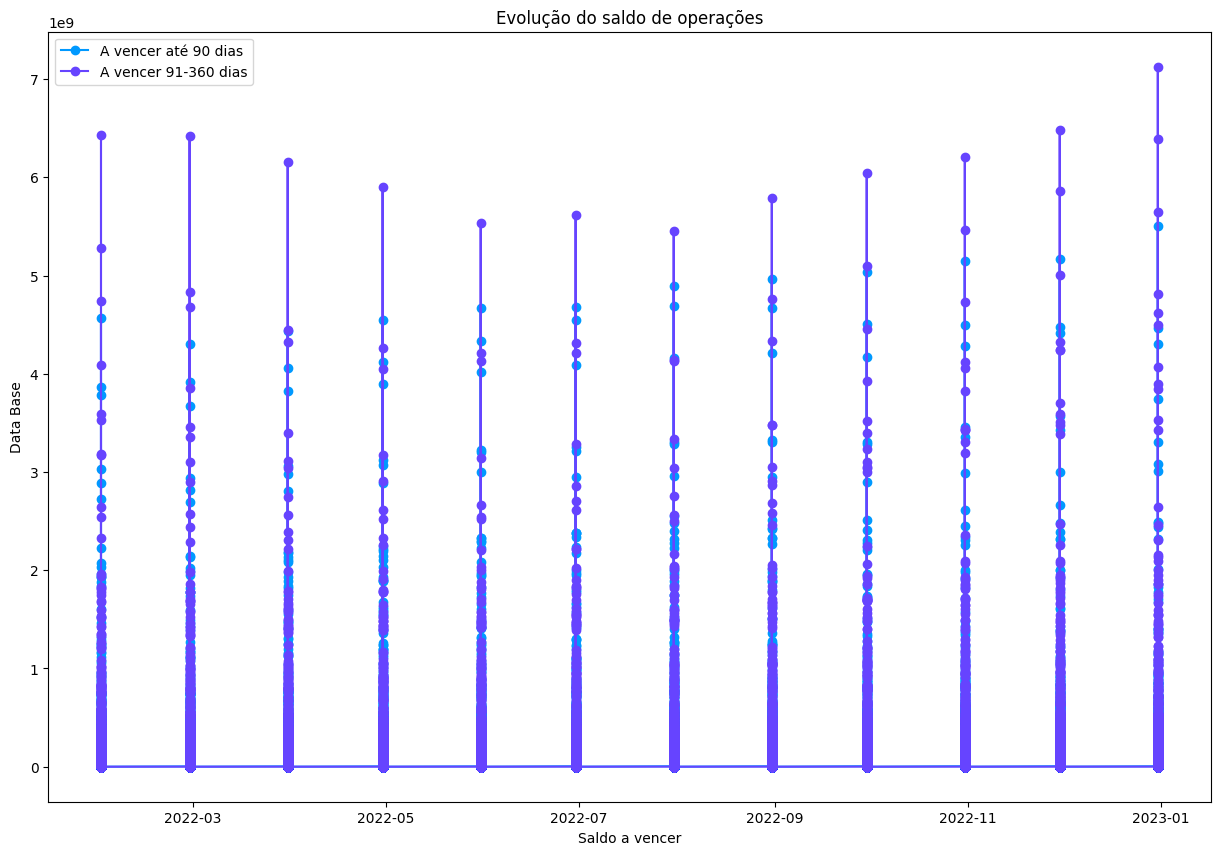

In [26]:
# Plot Template
plt.figure(figsize=(15,10),)
plt.title('Evolução do saldo de operações'); plt.xlabel('Saldo a vencer'); plt.ylabel('Data Base')
# Plot
plt.plot(scr_2022['data_base'], scr_2022['a_vencer_ate_90_dias'], marker='o', color='#0099ff', label='A vencer até 90 dias')
plt.plot(scr_2022['data_base'], scr_2022['a_vencer_de_91_ate_360_dias'], marker='o', color='#6644ff', label='A vencer 91-360 dias')
plt.legend()
plt.show()